In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv('Cleaned_Data.csv')
df = df.drop(columns=['DEATH_EVENT','AgeRange'])
train, test = train_test_split(df, test_size=0.2)
train = pd.get_dummies(train, columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], dtype=int, drop_first=True)
test = pd.get_dummies(test, columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], dtype=int, drop_first=True)
test.head(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_True,diabetes_True,high_blood_pressure_True,sex_True,smoking_True
88,44,84,40,235000.0,0.7,139,79,0,1,1,1,0
252,50,245,45,274000.0,1.0,133,215,0,0,1,1,0
218,68,1021,35,271000.0,1.1,134,197,1,1,0,1,0


In [4]:
X = train.drop(columns='time')
y_model = train['time']
model = LinearRegression()
model.fit(X, y_model)
model_p = sm.OLS.from_formula('time ~ ' + '+'.join(train.columns.difference(['time'])), train)
model_p = model_p.fit()
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3.171
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           0.000511
Time:                        01:02:05   Log-Likelihood:                -1360.0
No. Observations:                 239   AIC:                             2744.
Df Residuals:                     227   BIC:                             2786.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   85.1669    155.882      0.546      0.585    -221.994     392.327
age                         -1.1142      0.423     -2.631      0.009      -1.949      -0.280
anaemia_True               -24.0040      9.871     -2.432      0.016     -43.455      -4.553
creatinine_phosphokinase    -0.0085      0.005     -1.791      0.075      -0.018       0.001
diabetes_True               -6.6207     10.074     -0.657      0.512     -26.471      13.230
ejection_fraction            0.3319      0.412      0.805      0.422      -0.480       1.144
high_blood_pressure_True   -36.1706     10.246     -3.530      0.001     -56.359     -15.982
platelets                 2.024e-05   4.81e-05      0.421      0.674   -7.45e-05       0.000
serum_creatinine            -4.6730      4.640     -1.007      0.315     -13.816       4.470
serum_sodium                 0.9981      1.125      0.888      0.376      -1.218       3.214
sex_True                    -0.6799     11.512     -0.059      0.953     -23.364      22.004
smoking_True               -12.0841     11.626     -1.039      0.300     -34.992      10.824
==============================================================================
Omnibus:                       59.650   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.439
Skew:                          -0.001   Prob(JB):                      0.00328
Kurtosis:                       1.928   Cond. No.                     9.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
validation_data = test.drop(columns='time')
y_pred = model.predict(validation_data)
y_true = test['time']


def regression_results(y_true, y_pred):

    # Regression metrics
    mse=metrics.mean_squared_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)


    print('Mean Squared Error: ', round(mse,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))

regression_results(y_true, y_pred)

Mean Squared Error:  6105.5613
r2:  0.0376
MAE:  69.2888


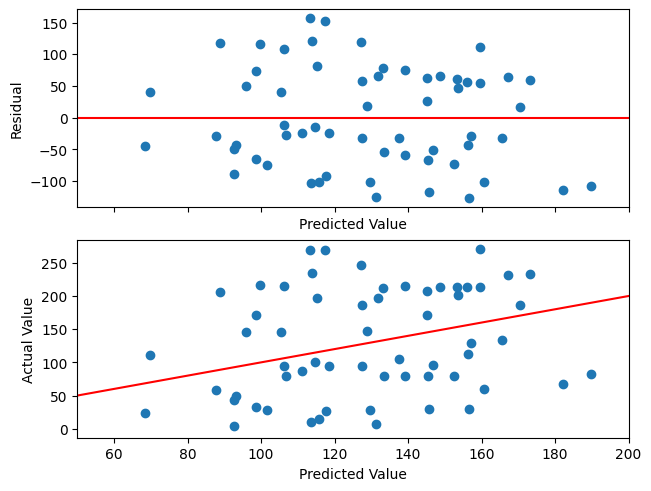

In [60]:
fig, axs = plt.subplots(2, 1, sharex=True, layout='constrained')
axs[0].scatter(y_pred, y_true-y_pred)
axs[0].axhline(0, color='red')
axs[0].set_ylabel('Residual')
axs[0].set_xlabel('Predicted Value')
axs[1].scatter(y_pred, y_true)
axs[1].axline((0,0),(1,1), color='red')
axs[1].set_ylabel('Actual Value')
axs[1].set_xlabel('Predicted Value')
axs[1].set_xlim(50,200)
plt.show()